Project Pipleline:
- Get the Data
- Analysis the Data
- Procces the data
- Convert categorical data into numerical data
- Spit into train test
- Train the ML model
- Check if their is scope of improvement in the model Accuracy

**Business Understanding**

Credit Card Fraud Detection is a classic class-imbalance problem where the number of fraud transactions is much lesser than the number of legitimate transaction for any bank. Most of the approaches involve building model on such imbalanced data, and thus fails to produce results on real-time new data because of overfitting on training data and a bias towards the majoritarian class of legitimate transactions. Thus, we can see this as an anomaly detection problem.

### Step 1: Data Collection

In [57]:
# ! pip install kaggle

In [58]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

Importing the Dataset

In [1]:
#API to tetch the dataset from Kaggle
# !kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2024

In [60]:
#extracting the compressed dataset
# from zipfile import ZipFile
# dataset = 'credit-card-fraud-detection-dataset-2024.zip'

# with ZipFile(dataset ,'r') as zip:
#   zip.extractall()
#   print("The Dataset is Extracted")

In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
credit_card_data = pd.read_csv("creditcard_2024.csv")

In [63]:
credit_card_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [64]:
#data set information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [65]:
# checking the missing values in the dataset
credit_card_data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\priya\AppData\Local\Temp\ipykernel_14028\657871729.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(credit_card_data['Class']).plot.bar()


<Axes: xlabel='Class'>

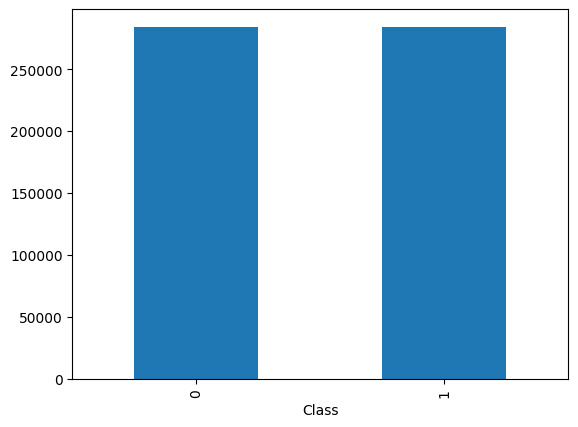

In [66]:
pd.value_counts(credit_card_data['Class']).plot.bar()
# The Data is perfectly balanced Dataset

In [67]:
legit = credit_card_data[credit_card_data.Class ==0]
fraud = credit_card_data[credit_card_data.Class ==1]

In [68]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(284315, 31)


In [69]:
# statistsical Measure of the Data
legit.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [70]:
fraud.Amount.describe()
## Here the mean vlaue is amse is Legit Transection so it is hard to ditinct the transection in case of the Amount

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [71]:
## Compare the values of both the transection
credit_card_data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


Need to do Under sampling if in the Classsification problem the Number of ) and 1 are distict use the sample of the dataset conaataing similar number of the points
data = data.sample(n= number of datapoint)

In [72]:
X =credit_card_data.iloc[:,1:30].values
Y = credit_card_data.iloc[:,30].values

In [73]:
print(X[:1])

[[-2.60647805e-01 -4.69648450e-01  2.49626608e+00 -8.37239127e-02
   1.29681236e-01  7.32898250e-01  5.19013618e-01 -1.30006048e-01
   7.27159269e-01  6.37734541e-01 -9.87020010e-01  2.93438100e-01
  -9.41386125e-01  5.49019894e-01  1.80487858e+00  2.15597994e-01
   5.12306661e-01  3.33643717e-01  1.24270156e-01  9.12018988e-02
  -1.10551680e-01  2.17606144e-01 -1.34794495e-01  1.65959115e-01
   1.26279976e-01 -4.34823981e-01 -8.12301086e-02 -1.51045486e-01
   1.79821000e+04]]


In [74]:
X_train , X_test , Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)

In [75]:
print(X.shape,X_train.shape,X_test.shape)

(568630, 29) (454904, 29) (113726, 29)


Model Training
-- Logistic Regression


In [76]:
model  = LogisticRegression()

In [77]:
# Traing the logistic Regression Model and Training Data
model.fit(X_train,Y_train)

c:\Users\priya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
# Model  evaluation
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [79]:
print("Accuracy on Training Data:",training_data_accuracy)

Accuracy on Training Data: 0.9581779892021174


In [80]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print("Accuracy on Test Data:" ,test_data_accuracy)

Accuracy on Test Data: 0.9577493273306016


 the accuracy score of Traing Data and Test Data varies very much that our model is overfitted or under fitted

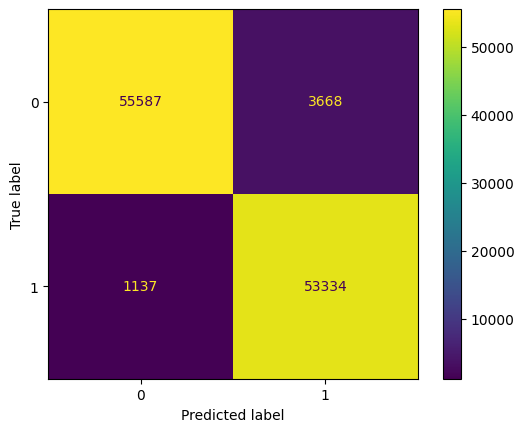

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_predictions(X_test_prediction,Y_test)

In [82]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     59255
           1       0.94      0.98      0.96     54471

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

